In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from scipy.stats import norm
from random import sample

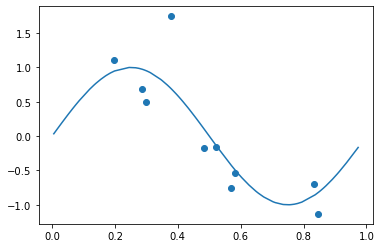

In [2]:
x_train = np.random.uniform(0, 1, 10)
x_train = np.array(sorted(x_train))
x = np.random.uniform(0, 1, 100)
x = np.array(sorted(x))
y_train = np.sin(2 * np.pi * x_train) + rand.randn(10) * 0.5
target = np.sin(2 * np.pi * x)

plt.plot(x,target)
plt.scatter(x_train,y_train) 
plt.show()

In [3]:
def cal(x_test,x_train,y_train,sigma):
    norm_vals = norm.pdf(x_test - x_train.reshape(10,1), loc=0, scale = sigma).T
    norm_vals = norm_vals/(norm_vals.sum(axis = 1,keepdims=True))

    Exp = (norm_vals * y_train.reshape(1,10)).sum(axis = 1)
    Cond = np.sqrt(sigma **2 +  (norm_vals * y_train.reshape(1,10) **2).sum(axis = 1) - Exp**2)
    return Exp, Cond

In [4]:

x_test = np.linspace(0,1,100) 
sigma_list = [0.01*i for i in range(1, 11)]

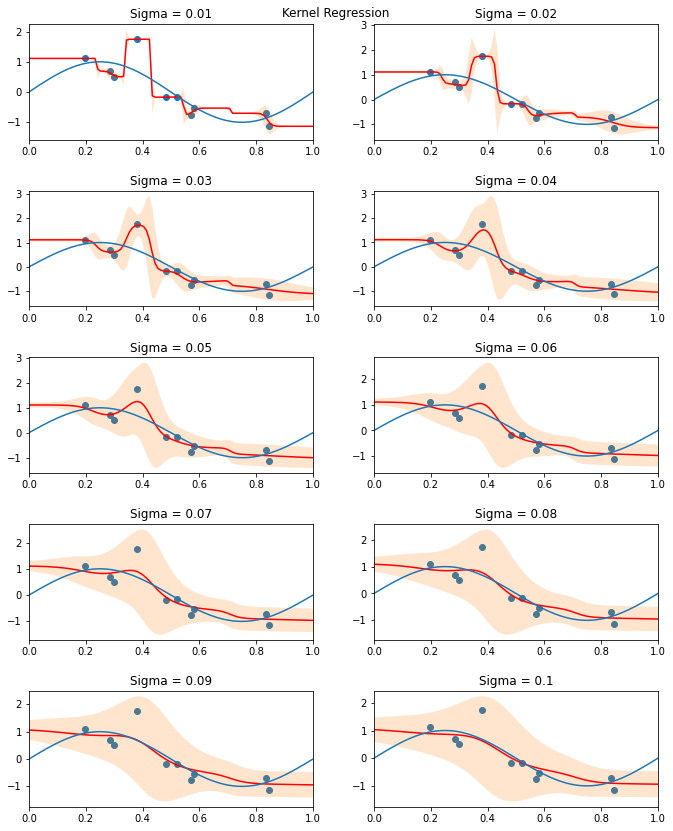

In [5]:

fig, axes = plt.subplots(5,2, figsize=(10,12))
fig.tight_layout(pad=3)
for sigma, axis in zip(sigma_list, axes.ravel()):
    Exp,var = cal(x_test,x_train,y_train,sigma)
    axis.scatter(x_train,y_train)
    axis.plot(x_test,Exp,color='red')
    axis.fill_between(x_test,Exp - 2*var, Exp + 2*var, alpha = 0.2)
    axis.plot(x_test,np.sin(2*np.pi*x_test))
    axis.set_title("Sigma = " f"{sigma}")
    axis.set_xlim(0, 1);
plt.suptitle("Kernel Regression")
plt.savefig("1")